In [65]:
#	 基于历史收益率数据
#	 股票价格数据
import numpy as np
stock_prices= np.array([
				 [100, 102, 101, 105, 108],	#	 股票 A
				 [50, 52, 51, 55, 53],		#	 股票 B
				 [200, 201, 205, 202, 210]	#	 股票 C
])

In [67]:
#	 计算不同权重配置下的组合⻛险和收益(提示⽣成 100 种 random	weights	combination)
#	 找出夏普⽐率最⾼的权重配置

#1.计算各股收益率和收益率均值
stock_returns = (stock_prices[:,1:]-stock_prices[:,:-1])/stock_prices[:,:-1]
stock_mean_retuns = np.mean(stock_returns,axis=1)
print("stock_returns:\n",stock_returns,"\nstock_mean_retuns:\n",stock_mean_retuns)

#2.计算协方差矩阵（风险）
cov_matrix = np.cov(stock_returns)
print("cov_matrix:\n",cov_matrix)


#3.组合风险和收益的函数
def portfolio_risk(weights,cov_matrix):
    # 计算组合方差： w^T * Σ * w
    portfolio_var = np.dot(weights.T,np.dot(cov_matrix,weights))
    portfolio_std =np.sqrt(portfolio_var)
    return portfolio_std

def portfolio_return(weights,stock_mean_retuns):
    p_r = np.dot(weights.T,stock_mean_retuns)
    return p_r



stock_returns:
 [[ 0.02       -0.00980392  0.03960396  0.02857143]
 [ 0.04       -0.01923077  0.07843137 -0.03636364]
 [ 0.005       0.0199005  -0.01463415  0.03960396]] 
stock_mean_retuns:
 [0.01959287 0.01570924 0.01246758]
cov_matrix:
 [[ 0.00044847  0.0006082  -0.00017341]
 [ 0.0006082   0.00281883 -0.00118468]
 [-0.00017341 -0.00118468  0.0005273 ]]


In [69]:
#计算不同权重配置下的组合⻛险和收益
result=[]
for i in range(100):
    #声称权重，权重之和为1
    weights = np.random.random(3)
    weights /= np.sum(weights)  # 归一化
    p_risk = portfolio_risk(weights,cov_matrix)
    p_return = portfolio_return(weights,stock_mean_retuns)
    #sharpe ratio
    sharpe_ratio = p_return/p_risk
    result.append([p_risk,p_return,sharpe_ratio,weights])
result =np.array(result,dtype=object)
print(result)

[[0.008503889742488065 0.015380383029346596 1.8086291679560993
  array([0.3358497 , 0.16034327, 0.50380703])]
 [0.0317820001935862 0.0176598938885066 0.5556570946113856
  array([0.5157357 , 0.46813926, 0.01612504])]
 [0.017294907864234953 0.01629205560093215 0.9420145934759993
  array([0.39011121, 0.3223106 , 0.28757819])]
 [0.01055550679990388 0.015850312589278704 1.5016154969861835
  array([0.38326671, 0.2010846 , 0.4156487 ])]
 [0.019038400619028645 0.014821666573192895 0.7785142706987068
  array([0.10461399, 0.4962525 , 0.39913351])]
 [0.011232356348493703 0.016258016044651942 1.4474270171131276
  array([0.50861952, 0.05132459, 0.44005588])]
 [0.01021473821016243 0.01427958434644403 1.3979393355610004
  array([0.07969826, 0.38379467, 0.53650707])]
 [0.015212967082328095 0.017127086318002128 1.1258215590236529
  array([0.57634974, 0.17054513, 0.25310513])]
 [0.01201432830244344 0.01596849666379915 1.3291210512827023
  array([0.3851024 , 0.23350752, 0.38139008])]
 [0.0194073974198395

In [71]:
#	 找出夏普⽐率最⾼的权重配置
maxid = np.argmax(result[:,2])
print(maxid)
best_weight = result[maxid,3]
print(best_weight)

64
[0.1235649 0.2524748 0.6239603]


In [61]:
#技术分析
import pandas as pd
import numpy as np
#	 创建示例价格数据
dates	 = pd.date_range('2024-01-01', periods=100)
prices	 = 100 + np.cumsum(np.random.normal(0, 1, 100))
price_series	 = pd.Series(prices, index=dates)
#print("price_series:")
#print(price_series.head())

##计算股票的 RSI 指标（14 ⽇）

#1.计算每日价格变化 Δ
delta = price_series.diff()
#print("\nprice_changes:")
#print(delta.head())

#2.分别取涨幅 (gain) 和跌幅 (loss)
gain = delta.clip(lower=0)
loss = delta.clip(upper=0)
#print("\nU:")
#print(gain.head(3))
#print("\nD:")
#print(loss.head(3))

#3.SMA 14day
SMA_U_14 = gain.rolling(window=14).mean()
SMA_D_14 = loss.rolling(window=14).mean()

#4.RS and RSI
RS= SMA_U_14 / SMA_D_14
RSI = (1-1/(1+RS)) 

In [85]:
#	 计算 MACD 指标
short_window = 12   # 短期 EMA
long_window = 26    # 长期 EMA
signal_window = 9   # 信号线 EMA

# 计算长期和短期EMA,MACD
EMA_short =price_series.ewm(span=short_window).mean()
EMA_long = price_series.ewm(span=long_window).mean()
MACD = EMA_short - EMA_long

#9日信号线
signal_line = MACD.ewm(span=signal_window).mean()

# 柱状图 = MACD线 - 信号线
macd_hist = MACD - signal_line


df = pd.DataFrame({'Close': price_series,'RSI':RSI,'MACD': MACD,'Signal': signal_line,'Hist': macd_hist})

# 基于技术指标⽣成交易信号
df['RSI_Signal'] = np.where(RSI < 30, 'Buy', 
                                       np.where(RSI > 70, 'Sell', 'Hold'))
df['MACD_Signal'] = np.where(macd_hist>0,"Buy",np.where(macd_hist<0,"Sell",'Hold'))
print(df.tail())

                 Close       RSI      MACD    Signal      Hist RSI_Signal  \
2024-04-05  110.096941  1.202441  1.164884  1.064698  0.100186        Buy   
2024-04-06  109.157261  1.559540  1.119940  1.075747  0.044194        Buy   
2024-04-07  108.365315  2.156385  1.008820  1.062361 -0.053541        Buy   
2024-04-08  109.155609  2.341066  0.973278  1.044545 -0.071267        Buy   
2024-04-09  110.152845  2.038947  1.013858  1.038407 -0.024550        Buy   

           MACD_Signal  
2024-04-05         Buy  
2024-04-06         Buy  
2024-04-07        Sell  
2024-04-08        Sell  
2024-04-09        Sell  


[118.87811497 101.42849939 123.45075363 ...  88.02237161 118.84992696
 123.34894615]
模拟均值: 108.30
95%置信区间: [64.19, 171.99]


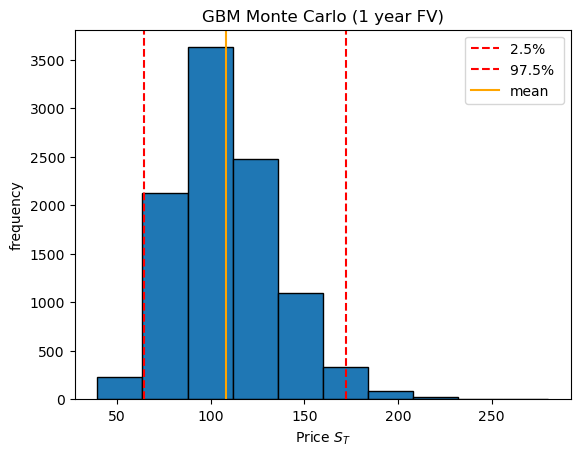

In [23]:
#蒙特卡洛，GBM,St =S0 * exp((mu- 1/2 * sigma^2)* dt + sigma *sqrt(dt))* Z,Z~N(0,1)
import numpy as np
import matplotlib.pyplot as plt

S0 = 100      # 初始价格
mu = 0.08     # 年化收益率
sigma = 0.25  # 年化波动率
dt = 1         # 时间（1年）
n_sim = 10000 # 模拟次数

# Monte Carlo 模拟
np.random.seed(42)
Z = np.random.standard_normal(n_sim) # 生成标准正态随机数
St = S0 * np.exp((mu - 0.5 * sigma**2)*dt + sigma *np.sqrt(dt)* Z)

print(St)

# 统计指标
mean_St = np.mean(St)
ci_lower = np.percentile(St, 2.5)   # 2.5%分位数
ci_upper = np.percentile(St, 97.5)  # 97.5%分位数

print(f"模拟均值: {mean_St:.2f}")
print(f"95%置信区间: [{ci_lower:.2f}, {ci_upper:.2f}]")

# 绘制直方图
plt.hist(St, edgecolor='black')
plt.axvline(ci_lower, color='red', linestyle='--', label='2.5% ')
plt.axvline(ci_upper, color='red', linestyle='--', label='97.5% ')
plt.axvline(mean_St, color='orange', linestyle='-', label='mean')
plt.title('GBM Monte Carlo (1 year FV)')
plt.xlabel('Price $S_T$')
plt.ylabel('frequency')
plt.legend()#图例
plt.show()

In [19]:
St = S0 * np.exp(mu)*dt
print(St)

108.32870676749586


In [25]:
theoretical_mean = S0 * np.exp(mu * dt)
print(f"模拟均值: {mean_St:.2f}")
print(f"理论均值: {theoretical_mean:.2f}")

模拟均值: 108.30
理论均值: 108.33
